<a href="https://colab.research.google.com/github/rajan083/DataAnalysis/blob/master/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         date datetime cash_type                 card  money    coffee_name
0  01-03-2024  15:50.5      card  ANON-0000-0000-0001   38.7          Latte
1  01-03-2024  19:22.5      card  ANON-0000-0000-0002   38.7  Hot Chocolate
2  01-03-2024  20:18.1      card  ANON-0000-0000-0002   38.7  Hot Chocolate
3  01-03-2024  46:33.0      card  ANON-0000-0000-0003   28.9      Americano
4  01-03-2024  48:14.6      card  ANON-0000-0000-0004   38.7          Latte


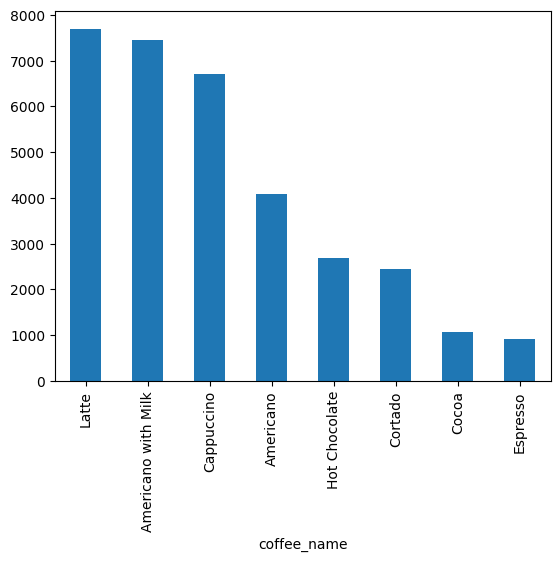

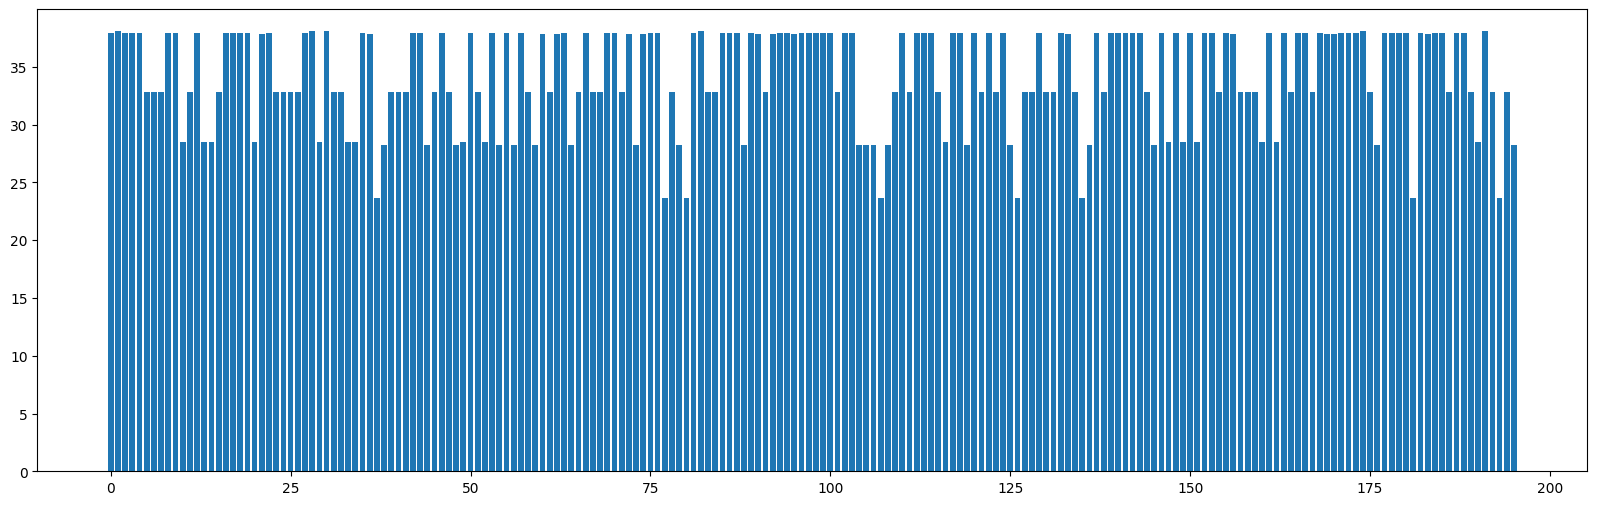

Latte: Predicted Values=37.94
Americano: Predicted Values=28.24
Espresso: Predicted Values=23.65


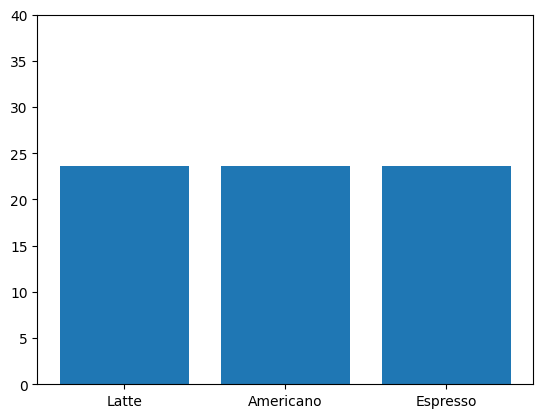

In [ ]:
import pandas as pd
a = pd.read_csv("/content/index.csv")
print(a.head())

x = a['coffee_name']
y = a['money']

category_revenue = a.groupby('coffee_name')['money'].sum().sort_values(ascending = False)

import matplotlib.pyplot as plt
category_revenue.plot(kind = 'bar')
plt.show()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x = ohe.fit_transform(x.values.reshape(-1,1)).toarray()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

pre = lr.predict(x_test)

plt.figure(figsize=(20,6))
plt.bar(range(len(pre)), pre)
plt.show()

def predict_revenue(new_data):
  new_data = pd.Series(new_data).values.reshape(-1,1)
  new_data_encoded = ohe.transform(new_data)
  return lr.predict(new_data_encoded)

new_coffees = ['Latte','Americano','Espresso']
revenue = predict_revenue(new_coffees)
for coffee, revenue in zip(new_coffees, revenue):
  print(f"{coffee}: Predicted Values={revenue:.2f}")

plt.bar(new_coffees, revenue)
plt.ylim(top=40)
plt.show()

In [ ]:
import pandas as pd
a = pd.read_csv('')